In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [130]:
df = pd.read_csv("day.csv")

In [131]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understand data

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [133]:
df.shape

(730, 16)

In [134]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data cleaning

#### Changing categorical variables

In [135]:
def change_month(month_no):
    if month_no == 1:
        return("Jan")
    if month_no == 2:
        return("Feb")
    if month_no == 3:
        return("March")
    if month_no == 4:
        return("April")
    if month_no == 5:
        return("May")
    if month_no == 6:
        return("June")
    if month_no == 7:
        return("July")
    if month_no == 8:
        return("Aug")
    if month_no == 9:
        return("Sept")
    if month_no == 10:
        return("Aug")
    if month_no == 11:
        return("Nov")
    if month_no == 12:
        return("Dec")

In [136]:
def change_season(season_no):
    if season_no == 1:
        return("spring")
    if season_no == 2:
        return("summer")
    if season_no == 3:
        return("fall")
    if season_no == 4:
        return("winter")

In [137]:
def change_weekday(weekday):
    if weekday == 0:
        return("Monday")
    if weekday == 1:
        return("Tuesday")
    if weekday == 2:
        return("Wednesday")
    if weekday == 3:
        return("Thursday")
    if weekday == 4:
        return("Friday")
    if weekday == 5:
        return("Saturday")
    if weekday == 6:
        return("Sunday")

In [138]:
def change_weathersit(weathersit):
    if weathersit == 1:
        return("Clear")
    if weathersit == 2:
        return("Mist")
    if weathersit == 3:
        return("Light Snow")
    if weathersit == 4:
        return("Heavy Rain")

In [139]:
df.mnth = df.mnth.apply(lambda x:change_month(x))
# df.yr = df.yr.apply(lambda x:'2018' if x == 0 else '2019')
df.season = df.season.apply(lambda x:change_season(x))
df.weekday = df.weekday.apply(lambda x:change_weekday(x))
df.weathersit = df.weathersit.apply(lambda x:change_weathersit(x))

In [140]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [141]:
df_updated = df.drop(['instant','dteday','temp','casual','registered'], axis = 1)

In [142]:
df_updated.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Clear,11.46350,43.6957,12.522300,1600


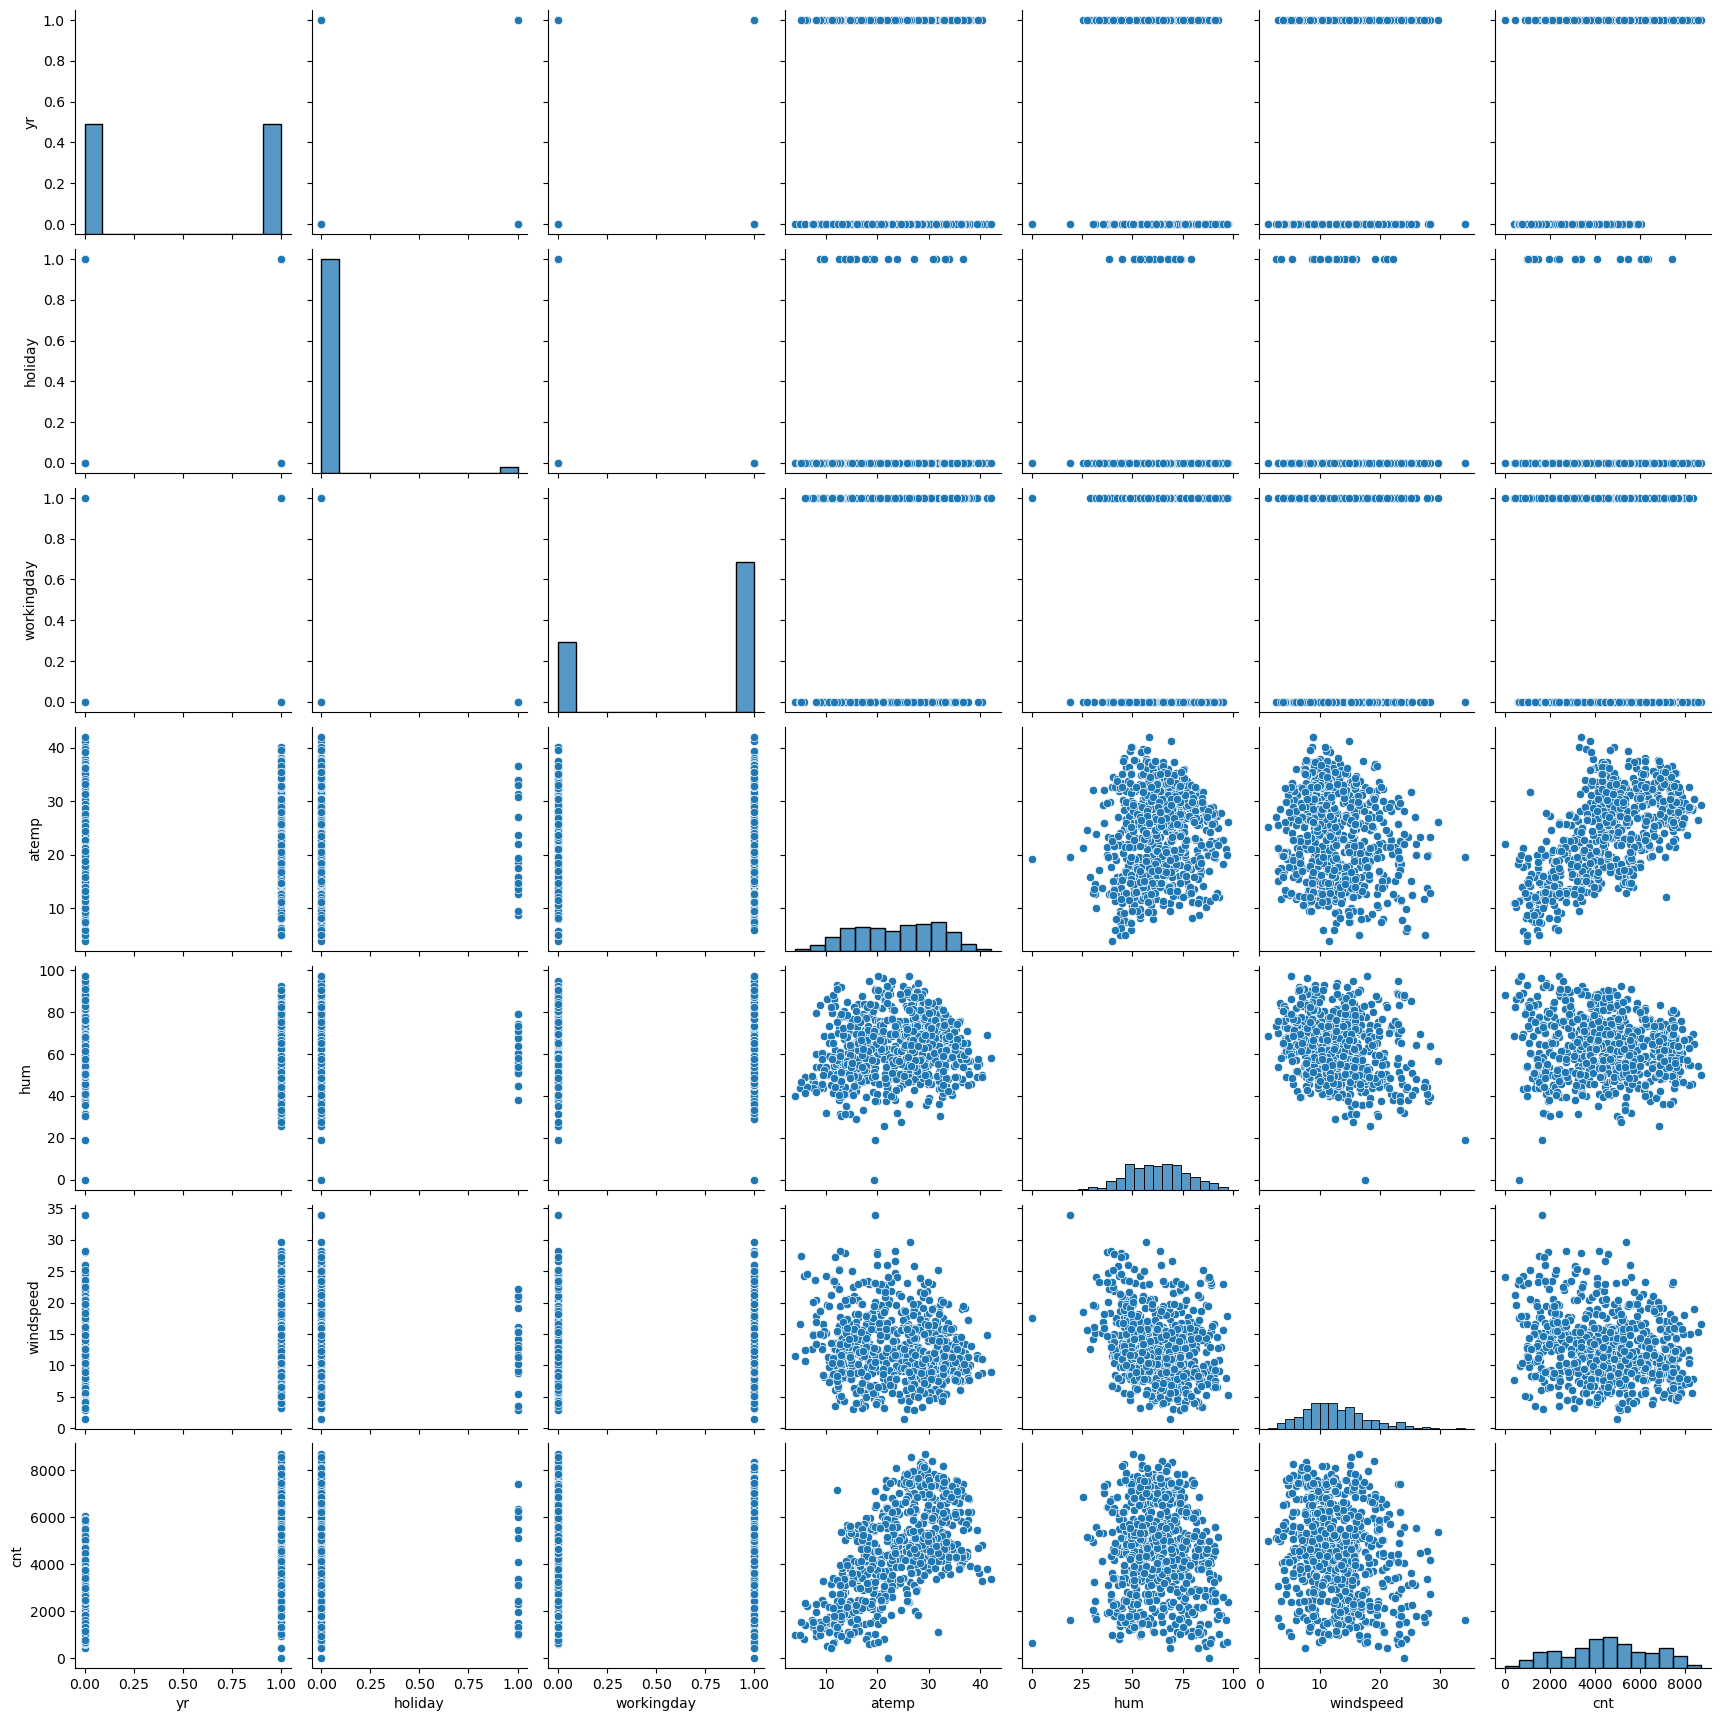

In [143]:
sns.pairplot(df_updated)

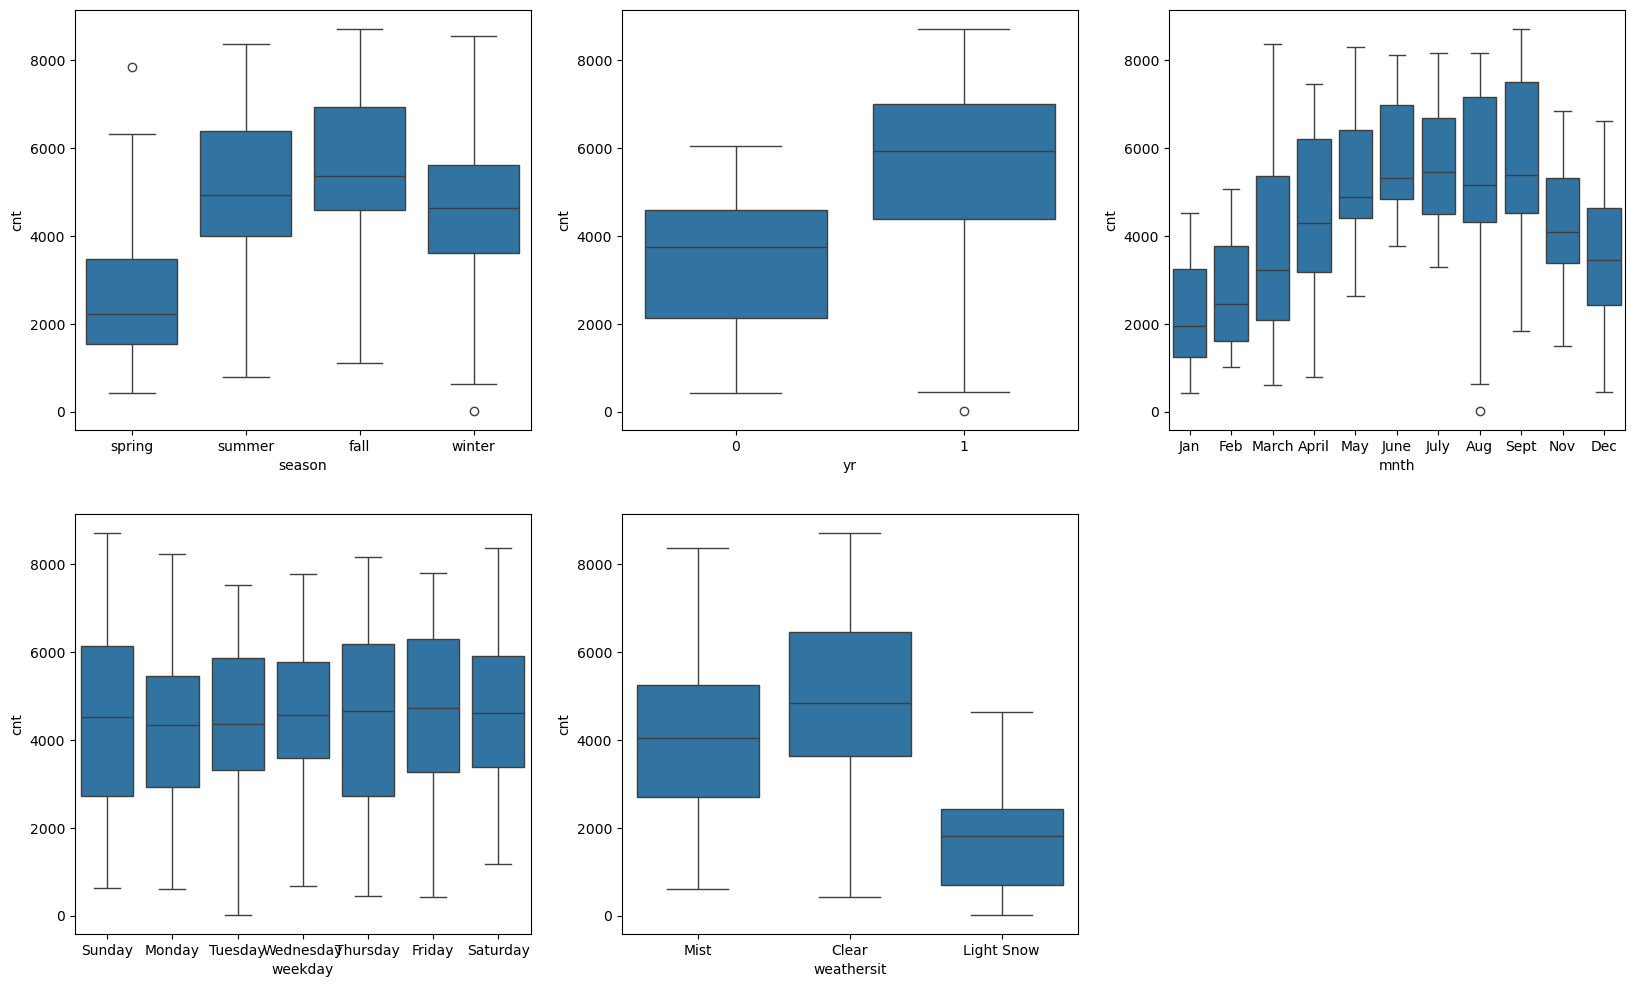

In [144]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_updated)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_updated)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_updated)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_updated)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_updated)
plt.show()

## Dummy Variables

In [145]:
months = pd.get_dummies(df_updated.mnth, dtype=int)
months.head()

,April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Sept
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [146]:
seasons = pd.get_dummies(df_updated.season, dtype=int, drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [147]:
weekdays = pd.get_dummies(df_updated.weekday, dtype=int, drop_first=True)
weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [148]:
weathersit = pd.get_dummies(df_updated.weathersit, dtype=int, drop_first=True)
weathersit.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [149]:
df_updated = pd.concat([df_updated, seasons, months, weekdays, weathersit], axis=1)
df_updated = df_updated.drop(['season','mnth','weekday','weathersit'], axis = 1)
df_updated.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Nov,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [150]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    int64  
 8   summer      730 non-null    int64  
 9   winter      730 non-null    int64  
 10  April       730 non-null    int64  
 11  Aug         730 non-null    int64  
 12  Dec         730 non-null    int64  
 13  Feb         730 non-null    int64  
 14  Jan         730 non-null    int64  
 15  July        730 non-null    int64  
 16  June        730 non-null    int64  
 17  March       730 non-null    int64  
 18  May         730 non-null    int64  
 19  Nov         730 non-null    i

## Train Test Split

In [151]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_updated, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [154]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Nov,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [155]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Nov,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

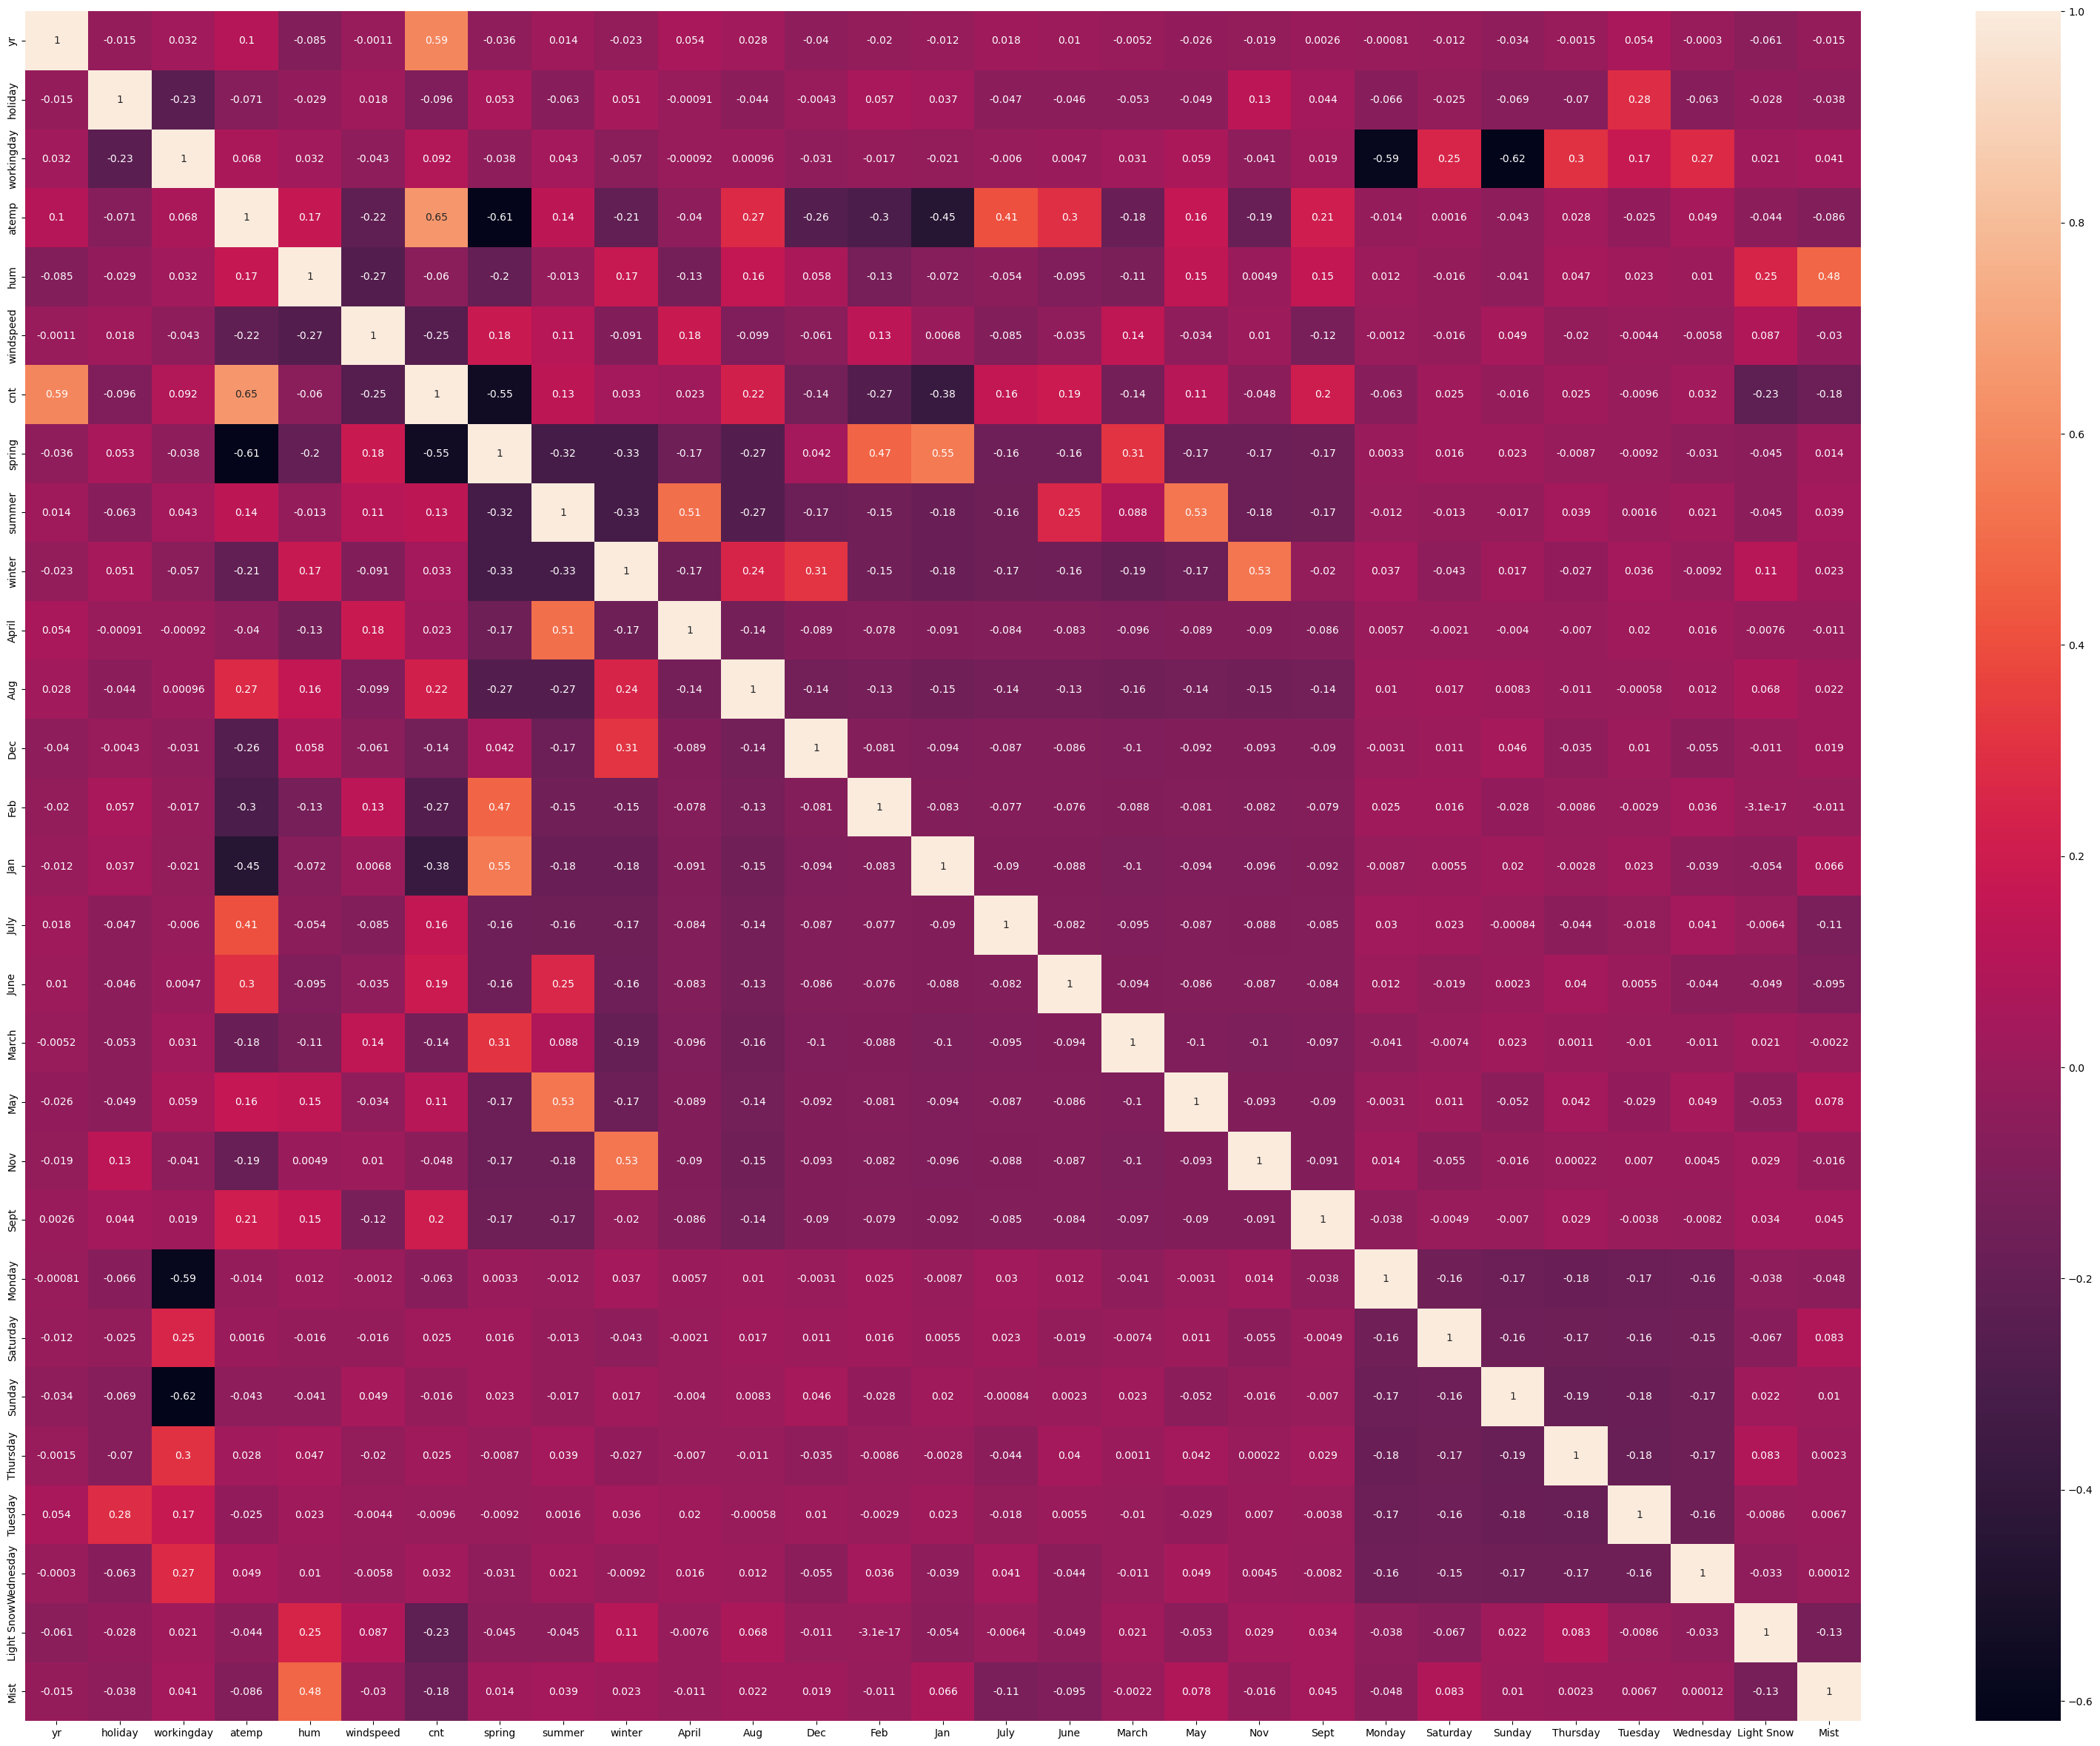

In [156]:
plt.figure(figsize = (40,30))
sns.heatmap(df_train.corr(), annot = True)

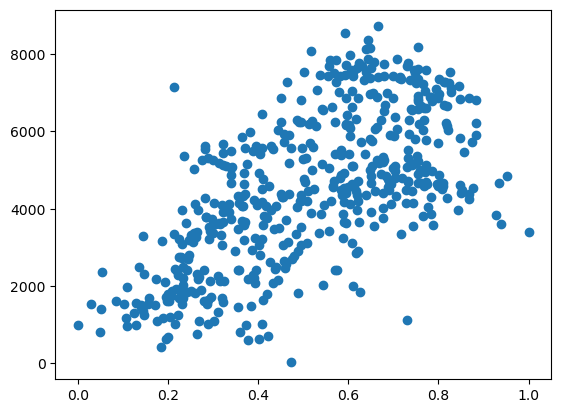

In [157]:
plt.scatter(df_train.atemp, df_train.cnt)

In [158]:
##atemp seems to have corelation with total count. Building linear model with atemp


## Linear Model

In [159]:
y_train = df_train.pop('cnt')
X_train = df_train

In [160]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [161]:
# Check the parameters obtained

lr.params

const    1438.132256
atemp    5942.135000
dtype: float64

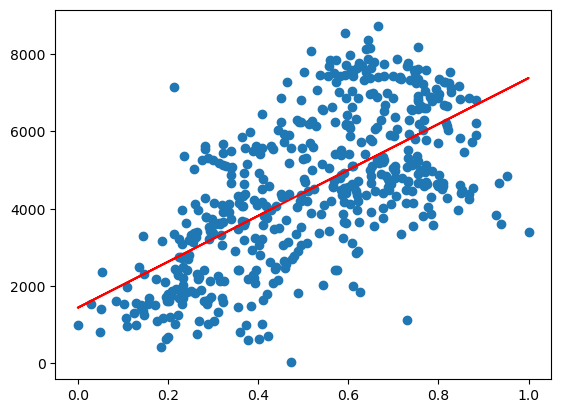

In [162]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1438.132 + 5942.135*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [163]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           1.10e-61
Time:                        15:17:55   Log-Likelihood:                -4449.3
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1438.1323    172.721      8.326      0.0

In [164]:
##Adding yr in variables as it also has a positive correlation with cnt

In [165]:
X_train_lm = sm.add_constant(X_train[['atemp','yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [166]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.07e-131
Time:                        15:17:57   Log-Likelihood:                -4283.9
No. Observations:                 510   AIC:                             8574.
Df Residuals:                     507   BIC:                             8587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        648.7311    130.289      4.979      0.0

In [167]:
##Adding all the variables to the model

## Model with all variables

In [168]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'April', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'March', 'May', 'Nov', 'Sept', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

In [169]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [170]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          5.58e-181
Time:                        15:18:04   Log-Likelihood:                -4102.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     483   BIC:                             8373.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2088.3399    239.397      8.723      0.0

### VIF with all variables

In [171]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\I563925\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
11,Dec,inf
10,Aug,inf
9,April,inf
18,Nov,inf
17,May,inf
16,March,inf
15,June,inf
14,July,inf


## Model 2

In [ ]:
# Removing holiday, Feb, July, Nov, Thursday, Wednesday          

In [180]:
X_train_m2 = X_train.drop(['holiday','Feb','July','Nov','Thursday','Wednesday'], axis = 1)
X_train_lm = sm.add_constant(X_train_m2)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [182]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          6.12e-185
Time:                        15:32:37   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     487   BIC:                             8349.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2084.6262    381.565      5.463      0.0

In [183]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.30
2,atemp,22.37
1,workingday,19.84
6,summer,8.36
5,spring,5.62
18,Sunday,5.52
16,Monday,5.25
4,windspeed,5.03
14,May,3.77
8,April,3.47


## Model 3

In [184]:
X_train_m3 = X_train_m2.drop(['Dec'], axis = 1)
X_train_lm = sm.add_constant(X_train_m3)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [185]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          5.98e-186
Time:                        15:32:56   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     488   BIC:                             8343.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2067.8275    379.853      5.444      0.0

In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.36
2,atemp,21.72
1,workingday,19.45
6,summer,8.36
5,spring,5.61
17,Sunday,5.39
15,Monday,5.18
4,windspeed,5.02
13,May,3.72
8,April,3.43


## Model 4

In [190]:
# ,'atemp','workingday','summer','spring','Sunday','Monday','windspeed']
X_train_m4 = X_train_m3.drop(['hum'], axis = 1)
X_train_lm = sm.add_constant(X_train_m4)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [191]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.16e-183
Time:                        15:39:45   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     489   BIC:                             8353.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1437.0062    350.331      4.102      0.0

In [192]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,17.10
2,atemp,15.06
5,summer,7.86
3,windspeed,4.92
16,Sunday,4.85
4,spring,4.78
14,Monday,4.54
12,May,3.72
7,April,3.41
6,winter,2.60


In [ ]:
# Rsqr = 0.845
# Summer P value = 0.571    
# VIF
# 	workingday	17.10
# 2	atemp	15.06
# 5	summer	7.86

# Remove 'Summer'

## Model 5

In [194]:

X_train_m5 = X_train_m4.drop(['summer'], axis = 1)
X_train_lm = sm.add_constant(X_train_m5)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [195]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.13e-184
Time:                        15:44:04   Log-Likelihood:                -4111.2
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     490   BIC:                             8347.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1499.2360    332.467      4.509      0.0

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.02
2,atemp,14.29
3,windspeed,4.86
15,Sunday,4.56
13,Monday,4.29
4,spring,3.77
5,winter,2.45
0,yr,2.10
7,Aug,1.93
8,Jan,1.90
